## Локальный и глобальный поиск

Решите задачу коммивояжера на основе файла данных `hw9_data/tsp.csv`: найти минимальный НЕЦИКЛИЧЕСКИЙ путь (начинается и заканчивается в разных точках), соединяющий N точек. Файл содержит координаты каждого из городов на плоскости (1й столбец - номер города, 2й и 3й - координаты). Используйте L1 расстояние для расчетов и визуализации.



In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

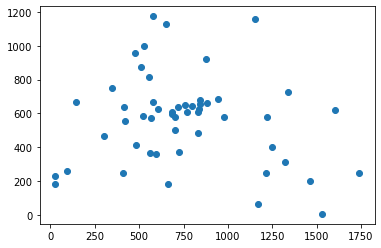

[[   0.  930.  395. ...  245.  925. 1505.]
 [ 930.    0.  885. ...  745. 1855. 1775.]
 [ 395.  885.    0. ...  640. 1020. 1900.]
 ...
 [ 245.  745.  640. ...    0. 1110. 1260.]
 [ 925. 1855. 1020. ... 1110.    0.  880.]
 [1505. 1775. 1900. ... 1260.  880.    0.]]


In [9]:
cities = pd.read_csv("hw9_data/tsp.csv", names=['x', 'y'], index_col=0)
n = cities.shape[0]

dist = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        dist[i][j] = abs(cities.loc[i+1, 'x'] - cities.loc[j+1, 'x']) + abs(cities.loc[i+1, 'y'] - cities.loc[j+1, 'y'])

plt.scatter(cities.loc[:, 'x'], cities.loc[:, 'y'])
plt.show()
print(dist)

In [141]:
f = open("tsp.in", 'w')
print(n, file=f)
for i in range(1, n):
    for j in range(0, i):
        print(int(dist[i][j]), end=" ", file=f)
    print("", file=f)
f.close()

In [63]:
def score(x):
    ans = 0
    for i in range(len(x)-1):
        ans += dist[x[i]][x[i+1]]
    return ans

global_start = np.random.permutation(range(n))

### Задание 1 (1 балл) 

Реализуйте Монте-Карло поиск.

Monte-Carlo Optimum = 28520.0


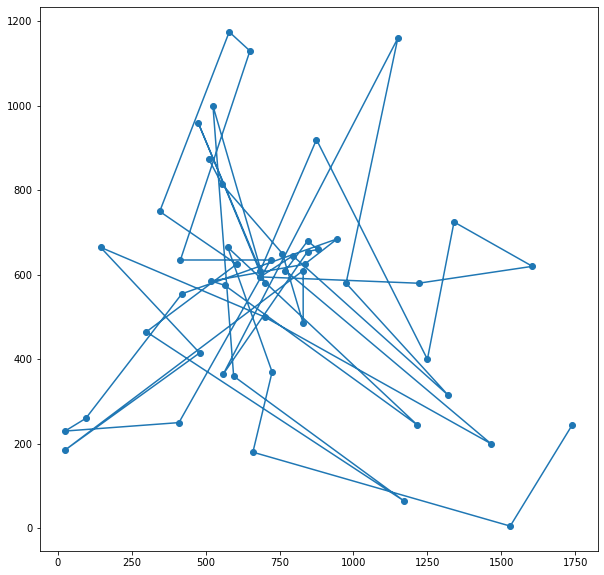

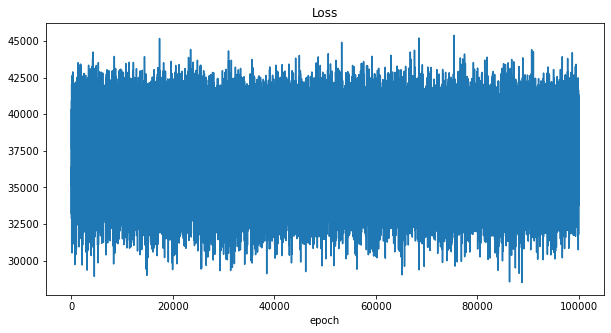

In [125]:
#YOUR_CODE
start = global_start.copy()
opt = score(start)
scores = [opt]
for _ in range(100000):
    tmp = np.random.permutation(range(n))
    opt_tmp = score(tmp)
    scores.append(opt_tmp)
    if opt_tmp < opt:
        start = tmp
        opt = opt_tmp
        
xs = [cities.loc[i+1, 'x'] for i in start]
ys = [cities.loc[i+1, 'y'] for i in start]
print("Monte-Carlo Optimum =", opt)
plt.figure(figsize=(10, 10))
plt.plot(xs, ys, 'o-')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(100001), scores)
plt.title("Loss")
plt.xlabel("epoch")
plt.show()

### Задание 2 (1 балл) 

Реализуйте поиск случайным блужданием.

Random walk Optimum = 27930.0


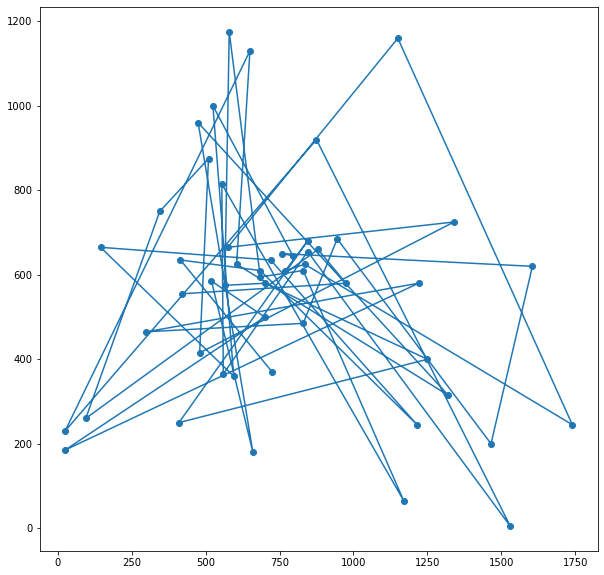

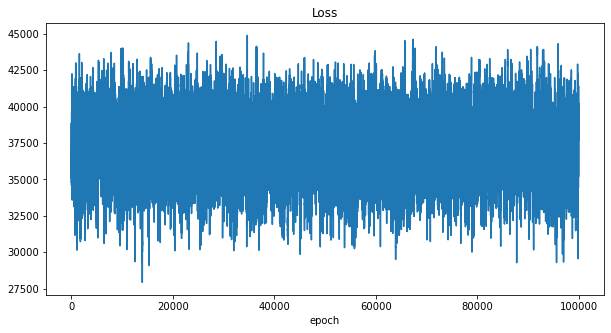

In [126]:
#YOUR_CODE
start = global_start.copy()
opt = score(start)
scores = [opt]
tmp = start.copy()
for _ in range(100000):
    a, b = np.random.choice(range(n), 2, replace=False)
    q = tmp[a]
    tmp[a] = tmp[b]
    tmp[b] = q
    opt_tmp = score(tmp)
    scores.append(opt_tmp)
    if opt_tmp < opt:
        start = tmp
        opt = opt_tmp    
        
xs = [cities.loc[i+1, 'x'] for i in start]
ys = [cities.loc[i+1, 'y'] for i in start]
print("Random walk Optimum =", opt)

plt.figure(figsize=(10, 10))
plt.plot(xs, ys, 'o-')
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(range(100001), scores)
plt.title("Loss")
plt.xlabel("epoch")
plt.show()

### Задание 3 (2 балла) 

Реализуйте Hill Climb.

Hill Climb Optimum = 28720.0


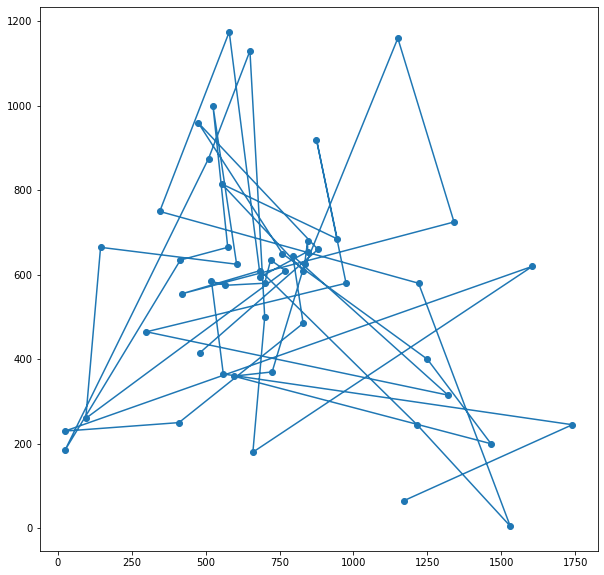

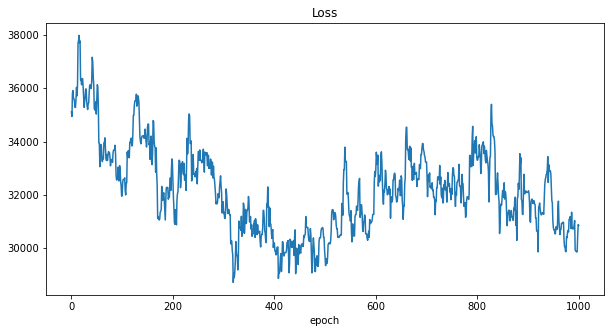

In [132]:
#YOUR_CODE
#YOUR_CODE
start = global_start.copy()
opt = score(start)
scores = [opt]
for _ in range(1000):
    q = -1
    opt_tmp = opt
    probs = []
    probs.append(dist[start[1]][start[2]] - dist[start[0]][start[2]])
    if opt - dist[start[1]][start[2]] + dist[start[0]][start[2]] < opt:
        q = 0
        opt_tmp = opt - dist[start[1]][start[2]] + dist[start[0]][start[2]]
    for i in range(1, n-2):
        cur_opt = opt - dist[start[i-1]][start[i]] - dist[start[i+1]][start[i+2]] + dist[start[i-1]][start[i+1]] + dist[start[i]][start[i+2]]
        probs.append(opt - cur_opt)
        if cur_opt < opt:
            opt_tmp = cur_opt
            q = i
    probs.append(dist[start[-2]][start[-3]] - dist[start[-1]][start[-3]])
    if opt - dist[start[-2]][start[-3]] + dist[start[-1]][start[-3]] < opt:
        q = n-2
        opt_tmp = opt - dist[start[-2]][start[-3]] + dist[start[-1]][start[-3]]
    
    
    probs = np.array(probs)
    probs = probs - np.min(probs)
    probs = probs / sum(probs)
    q = np.random.choice(range(n-1), 1, p=probs)[0]
    
    qq = start[q]
    start[q] = start[q+1]
    start[q+1] = qq
    opt_tmp = score(start)
    scores.append(opt_tmp)
    if opt_tmp < opt:
        opt = opt_tmp
        
xs = [cities.loc[i+1, 'x'] for i in start]
ys = [cities.loc[i+1, 'y'] for i in start]
print("Hill Climb Optimum =", opt)

plt.figure(figsize=(10, 10))
plt.plot(xs, ys, 'o-')
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(range(1001), scores)
plt.title("Loss")
plt.xlabel("epoch")
plt.show()

### Задание 4 (3 балла) 


Реализуйте отжиг (simulated annealing). Температурный режим отжига выберите самостоятельно.

Simulated Annealing Optimum = 17750.0


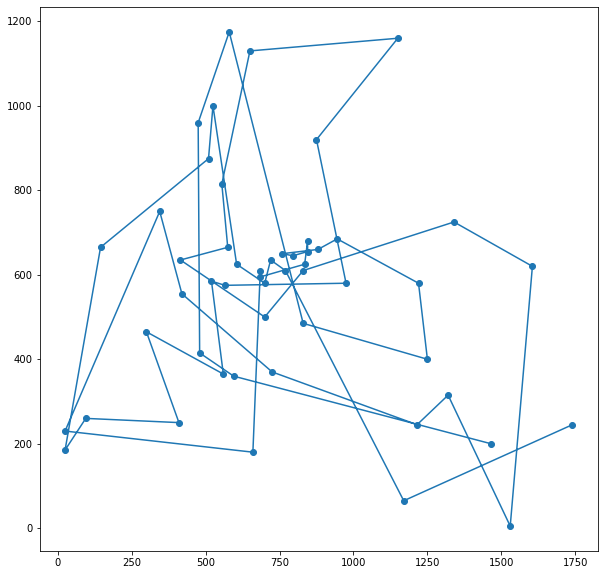

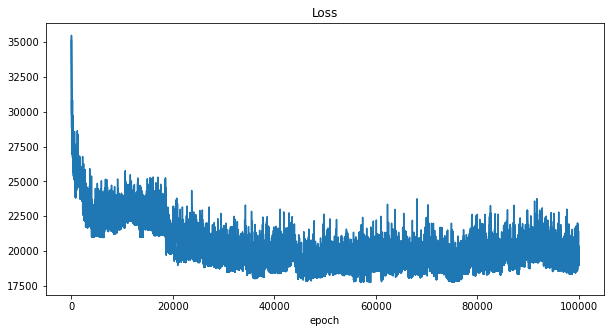

In [138]:
from sklearn.preprocessing import StandardScaler
#YOUR_CODE
start = global_start.copy()
opt = score(start)
scores = [opt]
best = start.copy()
for epoch in range(100000):
    q = -1
    opt_tmp = opt
    probs = []
    probs.append(dist[start[1]][start[2]] - dist[start[0]][start[2]])
    if opt - dist[start[1]][start[2]] + dist[start[0]][start[2]] < opt:
        q = 0
        opt_tmp = opt - dist[start[1]][start[2]] + dist[start[0]][start[2]]
    for i in range(1, n-2):
        cur_opt = opt - dist[start[i-1]][start[i]] - dist[start[i+1]][start[i+2]] + dist[start[i-1]][start[i+1]] + dist[start[i]][start[i+2]]
        probs.append(opt - cur_opt)
        if cur_opt < opt:
            opt_tmp = cur_opt
            q = i
    probs.append(dist[start[-2]][start[-3]] - dist[start[-1]][start[-3]])
    if opt - dist[start[-2]][start[-3]] + dist[start[-1]][start[-3]] < opt:
        q = n-2
        opt_tmp = opt - dist[start[-2]][start[-3]] + dist[start[-1]][start[-3]]
    
    probs = np.array(probs)
    probs = probs - np.min(probs)
    probs = StandardScaler().fit_transform(probs.reshape(-1, 1)).flatten()
    # Temperature
    #T = epoch % 100+1
    T = 0.1
    if epoch % 1000 <5:
        T = 1000
    elif epoch % 100 <5:
        T = 100
    elif epoch % 50 <5:
        T = 10
    elif epoch % 10 <5:
        T = 1
    probs = probs / T
    exps = np.exp(probs)
    probs = exps / sum(exps)
    q = np.random.choice(range(n-1), 1, p=probs)[0]
    
    qq = start[q]
    start[q] = start[q+1]
    start[q+1] = qq
        
    opt_tmp = score(start)
    scores.append(opt_tmp)
    if opt_tmp < opt:
        opt = opt_tmp
        best = start
        
xs = [cities.loc[i+1, 'x'] for i in best]
ys = [cities.loc[i+1, 'y'] for i in best]
print("Simulated Annealing Optimum =", opt)

plt.figure(figsize=(10, 10))
plt.plot(xs, ys, 'o-')
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(range(100001), scores)
plt.title("Loss")
plt.xlabel("epoch")
plt.show()

### Задание 5 (3 балла) 

Реализуйте генетический алгоритм.

Genetic Algorithm Optimum = 18260.0


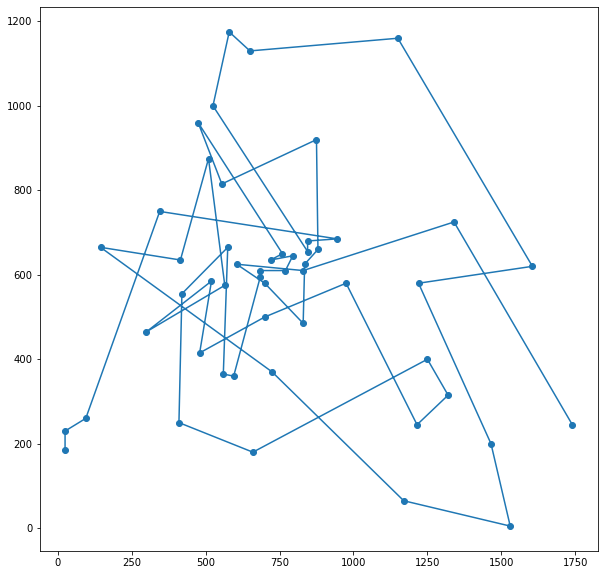

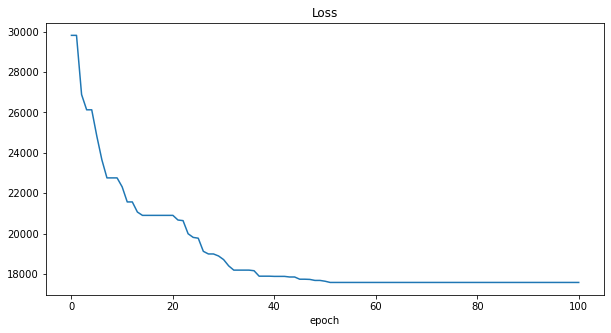

In [137]:
#YOUR_CODE
def crossover_with_mutations(x, y):
    unused = set(x)
    ans = []
    for a, b in zip(x, y):
        q = np.random.choice([a, b], 1)[0]
        if q in unused:
            ans.append(q)
            unused.remove(q)
        else:
            ans.append(unused.pop())
    return ans

pop_size=500

population = [global_start.copy()] + [np.random.permutation(range(n)) for _ in range(pop_size-1)]
opts = [score(i) for i in population]
scores = [min(opts)]
for epoch in range(100):
    offspring = []
    for _ in range(pop_size*3):
        a, b = np.random.choice(range(pop_size), 2, replace=False)
        offspring.append(crossover_with_mutations(population[a], population[b]))
    off_opts = [score(i) for i in offspring]
    
    total = population + offspring
    total_opts = opts + off_opts
    population = []
    opts = []
    for a, b in sorted(zip(total, total_opts), key = lambda x: x[1])[:pop_size]:
        population.append(a)
        opts.append(b)
    scores.append(min(opts))
    
xs = [cities.loc[i+1, 'x'] for i in population[0]]
ys = [cities.loc[i+1, 'y'] for i in population[0]]
print("Genetic Algorithm Optimum =", opt)

plt.figure(figsize=(10, 10))
plt.plot(xs, ys, 'o-')
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(range(101), scores)
plt.title("Loss")
plt.xlabel("epoch")
plt.show()

2opt and Partition Crossover for TSP Optimum = 8965.0


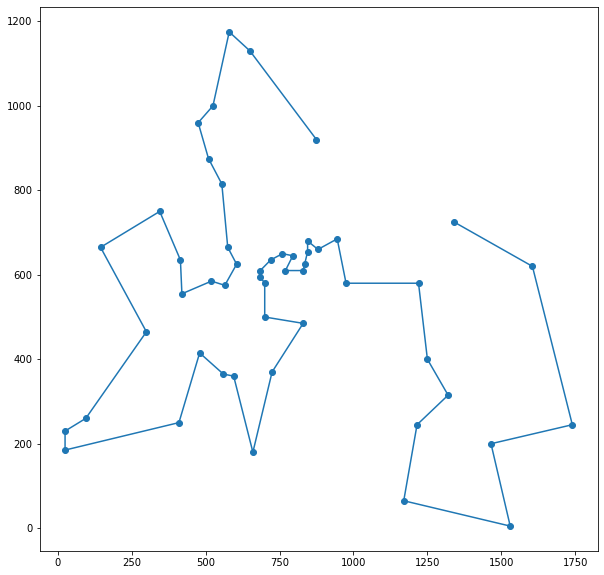

In [155]:
# CPP solution available at github

cpp = np.loadtxt("TSP/tsp.out", dtype=int)-1

ans = 0
max_edge = 0
pos = -1
for i in range(len(cpp)-1):
    ans += dist[cpp[i]][cpp[i+1]]
    if dist[cpp[i]][cpp[i+1]] > max_edge:
        max_edge = dist[cpp[i]][cpp[i+1]]
        pos = i
ans += dist[cpp[-1]][cpp[0]]
if dist[cpp[-1]][cpp[0]] > max_edge:
    max_edge = dist[cpp[-1]][cpp[0]]
    pos = len(cpp)-1

print("2opt and Partition Crossover for TSP Optimum =", ans - max_edge)
path = list(cpp[pos+1:]) + list(cpp[:pos])



xs = [cities.loc[i+1, 'x'] for i in path]
ys = [cities.loc[i+1, 'y'] for i in path]
plt.figure(figsize=(10, 10))
plt.plot(xs, ys, 'o-')
plt.show()    